<a href="https://colab.research.google.com/github/christophercallaghan2022/MSDS422/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 

Use all explanatory variables (except neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, stochastic gradient descent, ridge regression, lasso regression, and elastic net. Also employ random forests to the regression problem, following methods described in Géron (2017) Chapter 7. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. Python scikit-learn should be your primary environment for conducting this research.

Try alternative versions of random forests and gradient boosting. Select a best modeling method for the Boston Housing Study. Employ that method on the full data set, obtaining results that you can report to management.

Regarding the management problem, imagine that you again are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management and why? Reviewing the results of the random forests and gradient boosting model you have selected to present to management, which explanatory variables are most important in predicting home prices?

#Data Dictionary




* Neighborhood = Name of the Boston neighborhood
* mv = Median valeu homes in thousands of 1970 dollars
* nox = Air pollution
* crim = crime rate
* zn = Percent of land zoned for lots
* indus = Percent of business that is industrial or nonretail
* chas = On the Charles River (1) or not (0)
* rooms = Average number of rooms per home
* age = Percentage of homes built before 1940
* dis = Weighted distance to employment centers
* rad = Accessibility to radial highways
* tax = Tax rate
* ptratio = Pupil/teacher ratio in public schools
* lstat = percentage of population of lower socio-economic status



# Data Preparation

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/MSDS_422/Assignment_4
!pwd
!ls
print('Working Directory')
print(os.getcwd())

/content/gdrive/My Drive/MSDS_422/Assignment_4
/content/gdrive/My Drive/MSDS_422/Assignment_4
boston.csv
Working Directory
/content/gdrive/My Drive/MSDS_422/Assignment_4


In [ ]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  .

# Data Exploration and Visualization

Based on the request, we know that the target variable for this model will be the median value of owner-occupied homes.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

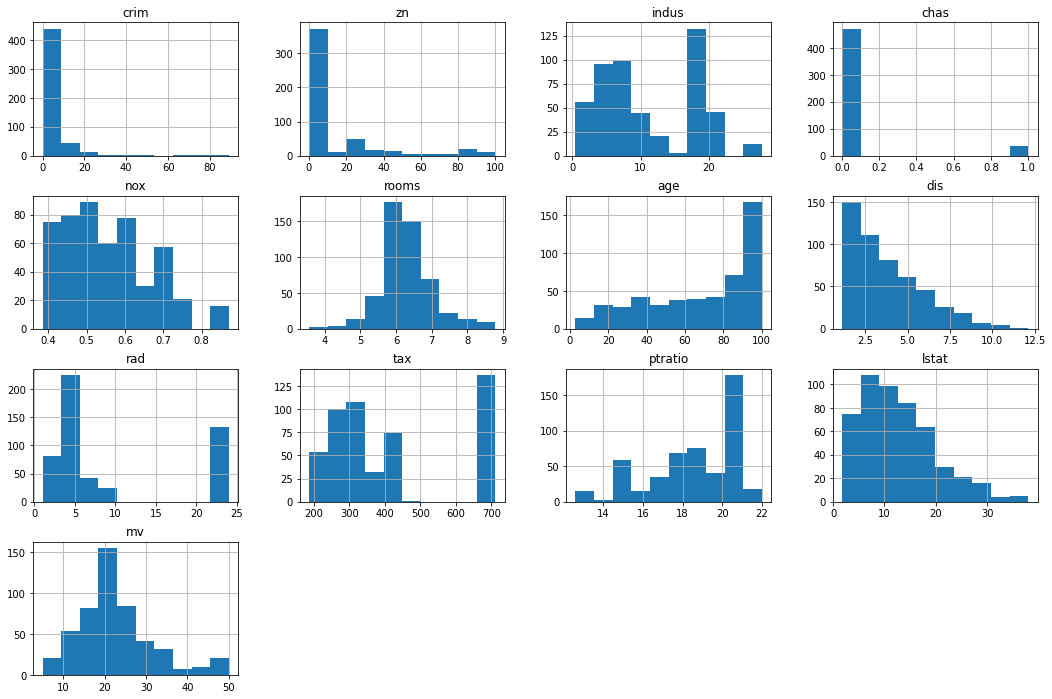

In [ ]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


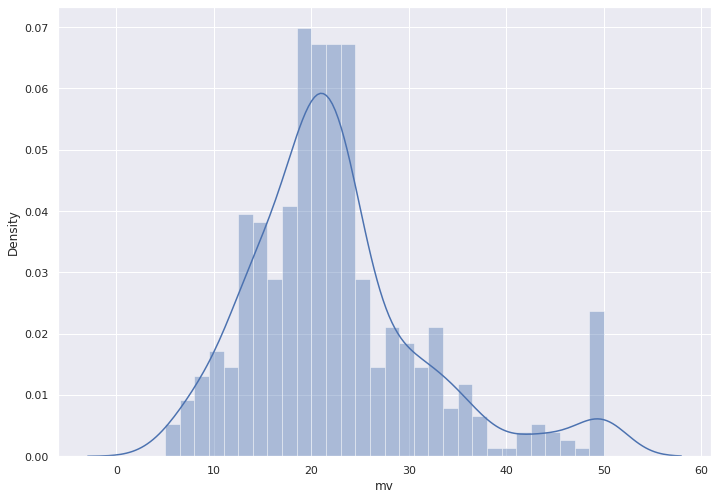

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['mv'], bins=30)
plt.show()

It can be seen that the values appear to have a near normal distribution.  There is an outlier on the right tail.  We can attribute this outlier to the cap that was put on for any home exceeding $50,000

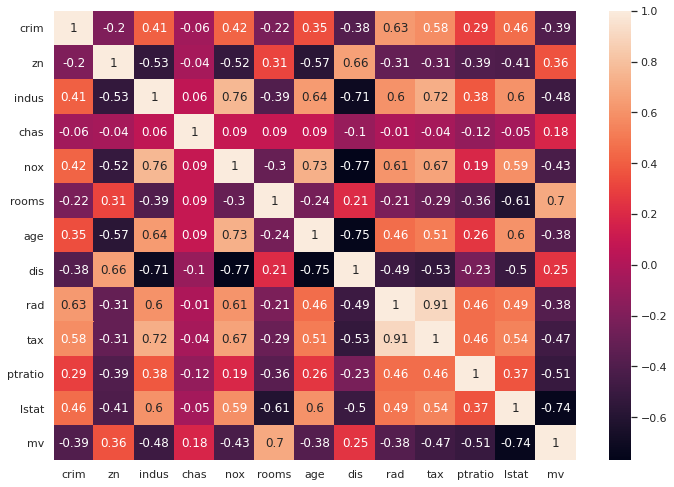

In [ ]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

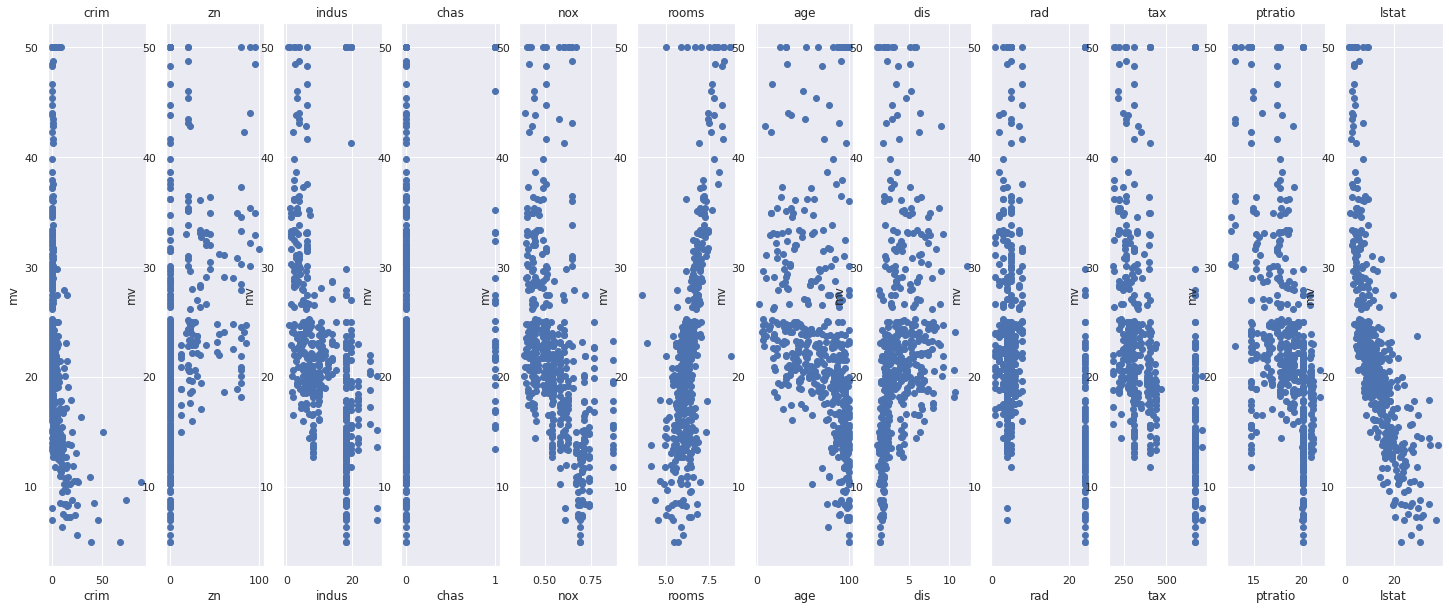

In [ ]:
plt.figure(figsize=(25, 10))

features = ['crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
target = boston['mv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mv')

##Initial Observations

Since we set our target variable to 'mv' we are primarily concerned with the bottom row of the correlation matrix

*   It can be seend that the number of rooms has the strongest positive correlation at 0.7
*   Conversly, the percentage of lower status of the population has teh strongest negative correlation at -0.74
*   The skewed distribution of median house values (and several features) suggests that a log transformation would be appropriate.



# Data Scaling

In [ ]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Data dimensions: (506, 13)
StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)


In [ ]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [ ]:
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [ ]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [ ]:
model_df = pd.DataFrame(model_data,columns = ['mv','crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])

In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mv       506 non-null    float64
 1   crim     506 non-null    float64
 2   zn       506 non-null    float64
 3   indus    506 non-null    float64
 4   chas     506 non-null    float64
 5   nox      506 non-null    float64
 6   rooms    506 non-null    float64
 7   age      506 non-null    float64
 8   dis      506 non-null    float64
 9   rad      506 non-null    float64
 10  tax      506 non-null    float64
 11  ptratio  506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


# Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = model_df[['crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
y = model_df['mv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape) 

(404, 12)
(102, 12)
(404,)
(102,)


#Regression Models

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# model evaluation for training set
y_train_predict_lin = lin_reg.predict(X_train)
rmse_train_lin = (np.sqrt(mean_squared_error(y_train, y_train_predict_lin)))
r2_train_lin = r2_score(y_train, y_train_predict_lin)

print("The model performance for training set")
print('RMSE is {}'.format(rmse_train_lin))
print('R2 score is {}'.format(r2_train_lin))
print("\n")

# model evaluation for testing set
y_test_predict_lin = lin_reg.predict(X_test)
rmse_test_lin = (np.sqrt(mean_squared_error(y_test, y_test_predict_lin)))
r2_test_lin = r2_score(y_test, y_test_predict_lin)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse_test_lin))
print('R2 score is {}'.format(r2_test_lin))

The model performance for training set
RMSE is 0.5120279027654873
R2 score is 0.7446750310344625


The model performance for testing set
RMSE is 0.5221427668344036
R2 score is 0.6889126286679554


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


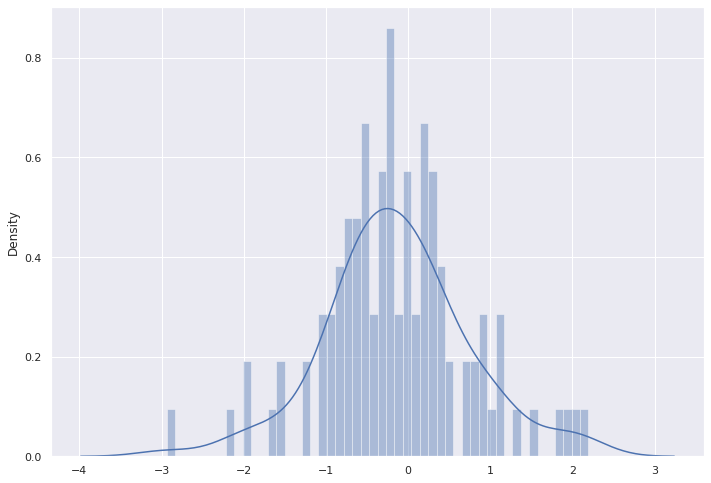

In [ ]:
sns.distplot((y_test_predict_lin),bins=50)

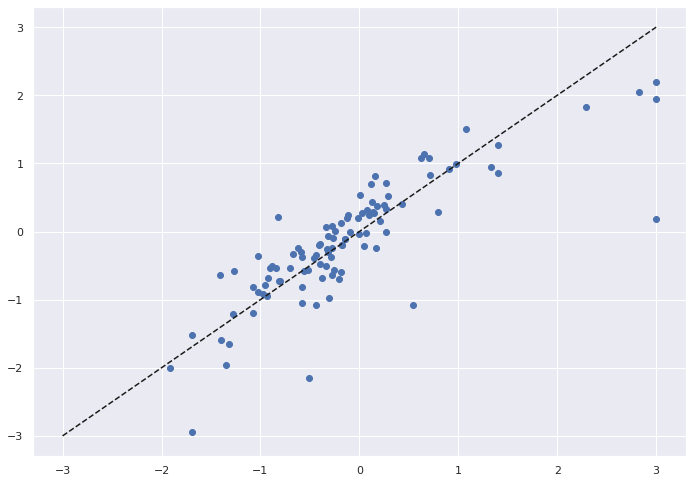

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict_lin)
plt.plot([-3, 3], [-3, 3], '--k')
plt.show()

In [ ]:
def plot_learning_curves(model,X,y):
  X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.2)
  train_errors,val_errors = [],[]
  for m in range (1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")

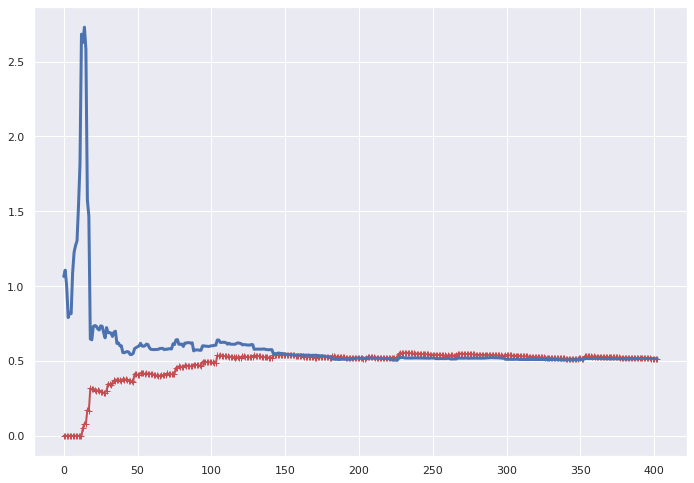

In [ ]:
plot_learning_curves(lin_reg,X,y)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver = "cholesky")
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [ ]:
y_train_predict_ridge = ridge_reg.predict(X_train)
rmse_train_ridge = (np.sqrt(mean_squared_error(y_train, y_train_predict_ridge)))
r2_train_ridge = r2_score(y_train, y_train_predict_ridge)

print("The model performance for training set")
print('RMSE is {}'.format(rmse_train_ridge))
print('R2 score is {}'.format(r2_train_ridge))
print("\n")

# model evaluation for testing set
y_test_predict_ridge = ridge_reg.predict(X_test)
rmse_test_ridge = (np.sqrt(mean_squared_error(y_test, y_test_predict_ridge)))
r2_test_ridge = r2_score(y_test, y_test_predict_ridge)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse_test_ridge))
print('R2 score is {}'.format(r2_test_ridge))

The model performance for training set
RMSE is 0.5120280725058914
R2 score is 0.7446748617508341


The model performance for testing set
RMSE is 0.5221804365802203
R2 score is 0.6888677405428487


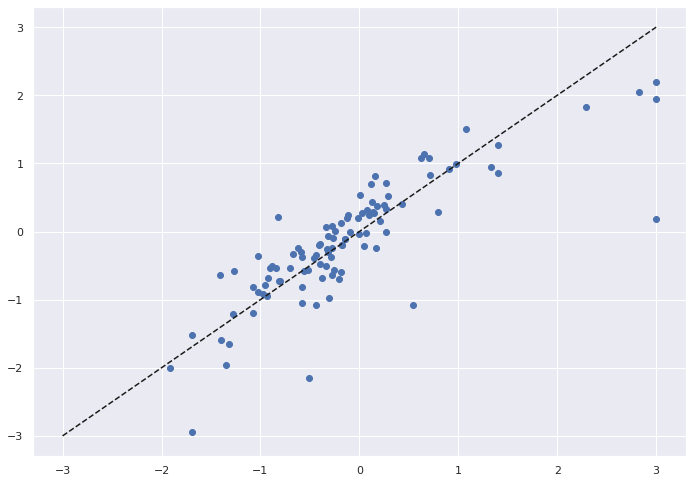

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict_ridge)
plt.plot([-3, 3], [-3, 3], '--k')
plt.show()

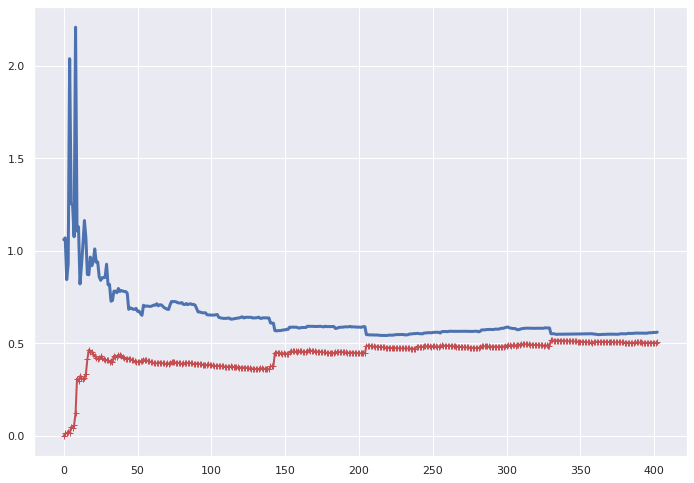

In [ ]:
plot_learning_curves(ridge_reg,X,y)

##Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_train_predict_lasso = lasso_reg.predict(X_train)
rmse_train_lasso = (np.sqrt(mean_squared_error(y_train, y_train_predict_lasso)))
r2_train_lasso = r2_score(y_train, y_train_predict_lasso)

print("The model performance for training set")
print('RMSE is {}'.format(rmse_train_lasso))
print('R2 score is {}'.format(r2_train_lasso))
print("\n")

# model evaluation for testing set
y_test_predict_lasso = lasso_reg.predict(X_test)
rmse_test_lasso = (np.sqrt(mean_squared_error(y_test, y_test_predict_lasso)))
r2_test_lasso = r2_score(y_test, y_test_predict_lasso)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse_test_lasso))
print('R2 score is {}'.format(r2_test_lasso))

The model performance for training set
RMSE is 0.5735934924427891
R2 score is 0.6795838025218492


The model performance for testing set
RMSE is 0.5713147411917793
R2 score is 0.6275613800002078


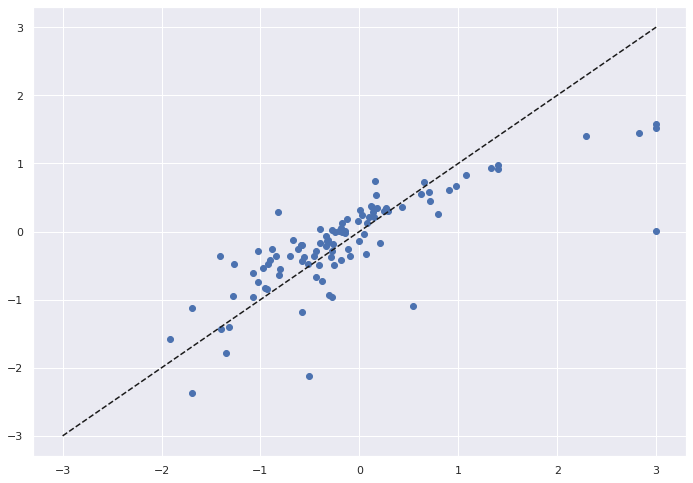

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict_lasso)
plt.plot([-3, 3], [-3, 3], '--k')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


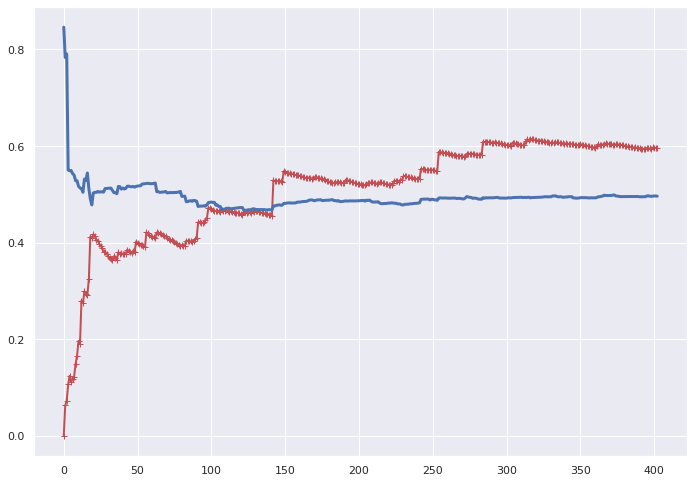

In [ ]:
plot_learning_curves(lasso_reg,X,y)

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

#Linear Regression, 10 folds
lin_cv = cross_val_score(lin_reg, X, y, cv = 10)
#Ridge Regression, 10 folds
ridge_cv = cross_val_score(ridge_reg, X, y, cv = 10)
#Linear Regression, 10 folds
lasso_cv = cross_val_score(lasso_reg, X, y, cv = 10)

print("Linear Regression:")
print(lin_cv)
print("Ridge Regression:")
print(ridge_cv)
print("Lasso Regression:")
print(lasso_cv)

Linear Regression:
[ 0.76507523  0.46067575 -1.31117514  0.63288566  0.53422868  0.72489101
  0.37826789 -0.01456621 -1.04100084  0.47795736]
Ridge Regression:
[ 0.76527587  0.46119919 -1.30806674  0.63277898  0.53444006  0.72492417
  0.37915653 -0.01439154 -1.04070835  0.4790911 ]
Lasso Regression:
[ 0.77143574  0.65180396 -0.16490511  0.4240415   0.53717797  0.42648261
  0.11807193  0.04007117 -1.54601511  0.55893567]


# Retrain with Log(MV)

In [ ]:
boston['mv'] = np.log(boston['mv'])
boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,3.589059


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


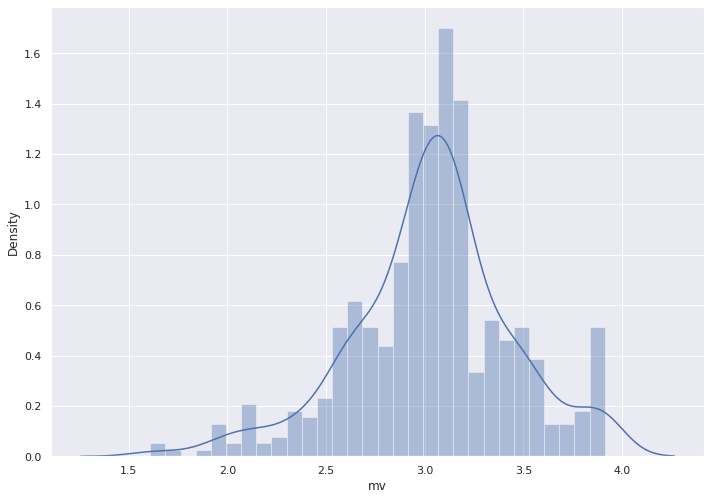

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['mv'], bins=30)
plt.show()

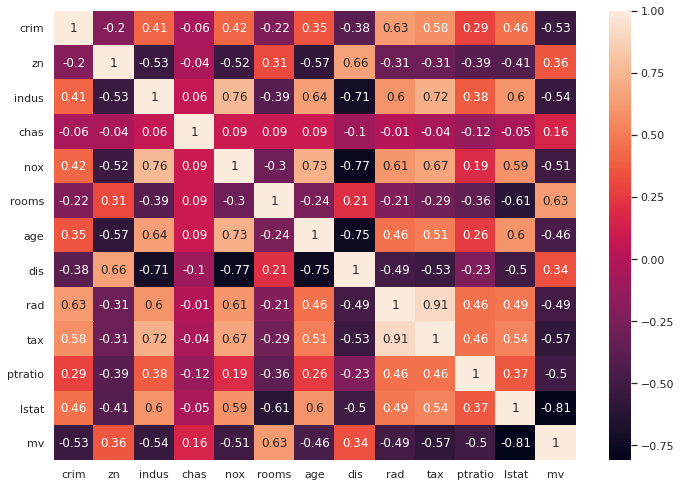

In [ ]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Data dimensions: (506, 13)
StandardScaler(copy=True, with_mean=True, with_std=True)
[3.03455800e+00 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[4.07871084e-01 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)


In [ ]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [ ]:
model_df = pd.DataFrame(model_data,columns = ['mv','crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])

In [ ]:
X_log = model_df[['crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
y_log = model_df['mv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape) 

(404, 12)
(102, 12)
(404,)
(102,)


## Linear, Ridge, Lasso Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# model evaluation for training set
y_train_predict_lin = lin_reg.predict(X_train)
rmse_train_lin = (np.sqrt(mean_squared_error(y_train, y_train_predict_lin)))
r2_train_lin = r2_score(y_train, y_train_predict_lin)

print("The model performance for training set")
print('RMSE is {}'.format(rmse_train_lin))
print('R2 score is {}'.format(r2_train_lin))
print("\n")

# model evaluation for testing set
y_test_predict_lin = lin_reg.predict(X_test)
rmse_test_lin = (np.sqrt(mean_squared_error(y_test, y_test_predict_lin)))
r2_test_lin = r2_score(y_test, y_test_predict_lin)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse_test_lin))
print('R2 score is {}'.format(r2_test_lin))

The model performance for training set
RMSE is 0.4606997980224938
R2 score is 0.7899792333153879


The model performance for testing set
RMSE is 0.4624617069738955
R2 score is 0.7732221181391202


In [ ]:
ridge_reg = Ridge(alpha=0.1, solver = "cholesky")
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [ ]:
y_train_predict_ridge = ridge_reg.predict(X_train)
rmse_train_ridge = (np.sqrt(mean_squared_error(y_train, y_train_predict_ridge)))
r2_train_ridge = r2_score(y_train, y_train_predict_ridge)

print("The model performance for training set")
print('RMSE is {}'.format(rmse_train_ridge))
print('R2 score is {}'.format(r2_train_ridge))
print("\n")

# model evaluation for testing set
y_test_predict_ridge = ridge_reg.predict(X_test)
rmse_test_ridge = (np.sqrt(mean_squared_error(y_test, y_test_predict_ridge)))
r2_test_ridge = r2_score(y_test, y_test_predict_ridge)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse_test_ridge))
print('R2 score is {}'.format(r2_test_ridge))

The model performance for training set
RMSE is 0.4606999965221811
R2 score is 0.7899790523339084


The model performance for testing set
RMSE is 0.46254986335204734
R2 score is 0.7731356512084337


In [ ]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_train_predict_lasso = lasso_reg.predict(X_train)
rmse_train_lasso = (np.sqrt(mean_squared_error(y_train, y_train_predict_lasso)))
r2_train_lasso = r2_score(y_train, y_train_predict_lasso)

print("The model performance for training set")
print('RMSE is {}'.format(rmse_train_lasso))
print('R2 score is {}'.format(r2_train_lasso))
print("\n")

# model evaluation for testing set
y_test_predict_lasso = lasso_reg.predict(X_test)
rmse_test_lasso = (np.sqrt(mean_squared_error(y_test, y_test_predict_lasso)))
r2_test_lasso = r2_score(y_test, y_test_predict_lasso)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse_test_lasso))
print('R2 score is {}'.format(r2_test_lasso))

The model performance for training set
RMSE is 0.5160815285179069
R2 score is 0.7364501179503402


The model performance for testing set
RMSE is 0.522350437598052
R2 score is 0.7106835919039607


In [ ]:
#Linear Regression, 10 folds
lin_cv = cross_val_score(lin_reg, X, y, cv = 10)
#Ridge Regression, 10 folds
ridge_cv = cross_val_score(ridge_reg, X, y, cv = 10)
#Linear Regression, 10 folds
lasso_cv = cross_val_score(lasso_reg, X, y, cv = 10)

print("Linear Regression:")
print(lin_cv)
print("Ridge Regression:")
print(ridge_cv)
print("Lasso Regression:")
print(lasso_cv)

Linear Regression:
[ 0.76507523  0.46067575 -1.31117514  0.63288566  0.53422868  0.72489101
  0.37826789 -0.01456621 -1.04100084  0.47795736]
Ridge Regression:
[ 0.76527587  0.46119919 -1.30806674  0.63277898  0.53444006  0.72492417
  0.37915653 -0.01439154 -1.04070835  0.4790911 ]
Lasso Regression:
[ 0.77143574  0.65180396 -0.16490511  0.4240415   0.53717797  0.42648261
  0.11807193  0.04007117 -1.54601511  0.55893567]


## Summary

In [ ]:
print("Linear Regression:")
print('RMSE is {}'.format(round(rmse_test_lin,4)))
print('R2 score is {}'.format(round(r2_test_lin,4)))
print('\n')

print("Ridge Regression:")
print('RMSE is {}'.format(round(rmse_test_ridge,4)))
print('R2 score is {}'.format(round(r2_test_ridge,4)))
print('\n')

print("Lasso Regression:")
print('RMSE is {}'.format(round(rmse_test_lasso,4)))
print('R2 score is {}'.format(round(r2_test_lasso,4)))

Linear Regression:
RMSE is 0.4625
R2 score is 0.7732


Ridge Regression:
RMSE is 0.4625
R2 score is 0.7731


Lasso Regression:
RMSE is 0.5224
R2 score is 0.7107


It can be seen that using the log of the median value produces a better R2 value when compared to using the median value.  Comparing the linear regression to the ridge regression we do not see any significant change to the R2 value when using both log(mv) and mv.

#Ensemble Methods
Target = Log(MV)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [ ]:
names = ["Decision Tree", "Random Forest", 'Gradient Boosting']
model = [DecisionTreeRegressor(max_depth=10, random_state = RANDOM_SEED,
                                    max_features='log2'),
            RandomForestRegressor(max_depth=10, random_state = RANDOM_SEED,
                                    max_features='log2', bootstrap=True),
           GradientBoostingRegressor(max_depth=10, random_state = RANDOM_SEED, 
                                     max_features='log2', learning_rate=0.1)]

In [ ]:
from sklearn.model_selection import KFold

n_folds = 10

cv_results = np.zeros((n_folds, len(names)))

kf = KFold(n_splits = n_folds, shuffle=False, random_state = RANDOM_SEED)

#initialize fold count
fold_count = 0

for train_index, test_index in kf.split(model_data):
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]

    y_train = model_data[train_index,0]
    y_test = model_data[test_index,0]
    
    print("\n---------------- Fold Count: {} ----------------".format(fold_count))
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    
    y_train = model_data[train_index,0]
    y_test = model_data[test_index,0]
    
    model_count = 0
    
    for name, clf in zip(names, model):
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_test)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        mse = mean_squared_error(y_test, pred)
        rmse = sqrt(mean_squared_error(y_test, pred))

        cv_results[fold_count, model_count] = rmse
        
        print("\n{}".format(name))
        print("Train Set Fit: {}".format(round(train_score, 2)))
        print("Test Set Fit: {}".format(round(test_score, 2)))

        print("RMSE: {}".format(round(rmse, 2)))
        
        model_count += 1
        
    fold_count += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



---------------- Fold Count: 0 ----------------

Decision Tree
Train Set Fit: 0.98
Test Set Fit: 0.37
RMSE: 0.52

Random Forest
Train Set Fit: 0.98
Test Set Fit: 0.53
RMSE: 0.45

Gradient Boosting
Train Set Fit: 1.0
Test Set Fit: 0.57
RMSE: 0.43

---------------- Fold Count: 1 ----------------

Decision Tree
Train Set Fit: 0.98
Test Set Fit: 0.36
RMSE: 0.38

Random Forest
Train Set Fit: 0.98
Test Set Fit: 0.79
RMSE: 0.22

Gradient Boosting
Train Set Fit: 1.0
Test Set Fit: 0.79
RMSE: 0.22

---------------- Fold Count: 2 ----------------

Decision Tree
Train Set Fit: 0.98
Test Set Fit: -1.81
RMSE: 0.63

Random Forest
Train Set Fit: 0.98
Test Set Fit: 0.54
RMSE: 0.26

Gradient Boosting
Train Set Fit: 1.0
Test Set Fit: 0.46
RMSE: 0.28

---------------- Fold Count: 3 ----------------

Decision Tree
Train Set Fit: 0.98
Test Set Fit: 0.05
RMSE: 0.77

Random Forest
Train Set Fit: 0.98
Test Set Fit: 0.65
RMSE: 0.47

Gradient Boosting
Train Set Fit: 1.0
Test Set Fit: 0.66
RMSE: 0.46

----------

In [ ]:
print('Average results from ', n_folds, '-fold cross-validation\n',
      '\nMethod                 RMSE', sep = '')     
print(round(cv_results_df.mean(),4))

Average results from 10-fold cross-validation

Method                 RMSE
Decision Tree        0.6741
Random Forest        0.4565
Gradient Boosting    0.4453
dtype: float64


##Feature Selection

In [ ]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad','tax', 'ptratio', 'lstat']

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

for feature in zip(features, gbr.feature_importances_):
    print(feature)

('crim', 0.13410037402487077)
('zn', 9.501851734111525e-05)
('indus', 0.0010715214674258916)
('chas', 0.0003571263974704062)
('nox', 0.052032729144358955)
('rooms', 0.17449377724582732)
('age', 0.006840774313003701)
('dis', 0.03849584416437286)
('rad', 0.0011515499744399777)
('tax', 0.01152638267244501)
('ptratio', 0.02289566276534677)
('lstat', 0.5569392393130973)


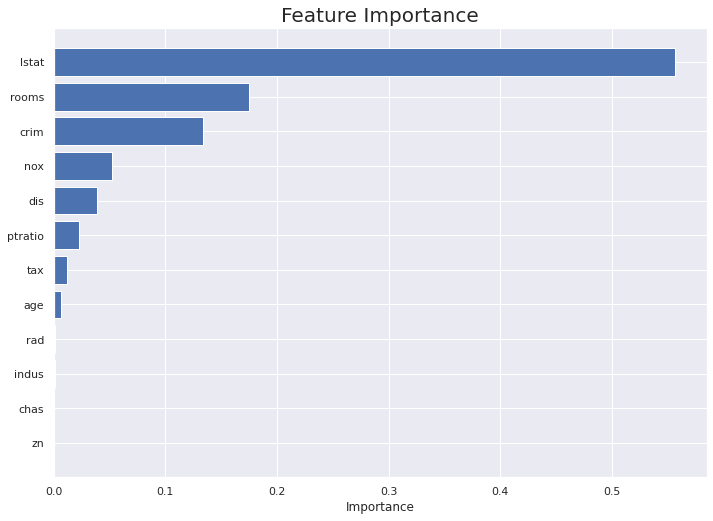

In [ ]:
importances = gbr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

##Apply GBR to entire data set
Previous results were applied only to the Train set

In [ ]:
gbr = GradientBoostingRegressor(max_depth=10, random_state = RANDOM_SEED)

gbr.fit(X_log,y_log)
gbrrmse = sqrt(mean_squared_error(y_log, gbr.predict(X_log)))
print("Model Score: {}".format(gbr.score(X_log,y_log)))
print("RMSE: {}".format(gbrrmse))

Model Score: 0.9999998968401541
RMSE: 0.0003211850647938943
